In [1]:
import os
import numpy as np
import tensorflow as tf
import cPickle as pickle
import matplotlib.pyplot as plt

In [7]:
# Change these constants to the directory that your
# data is stored in.
TRAIN_DIR = '../../../data/dogs-vs-cats/train/'
TEST_DIR = '../../../data/dogs-vs-cats/test/'
PROCESSED_LABEL_DIR = '../../../data/dogs-vs-cats/processed-labels/'
PROCESSED_TRAIN_DIR='../../../data/dogs-vs-cats/processed-train/'
PROCESSED_TEST_DIR ='../../../data/dogs-vs-cats/processed-test/'

# Extract the filenames for the train/test dataset
trainFilenames = [TRAIN_DIR+f for f in os.listdir (TRAIN_DIR)]
testFilenames = [TEST_DIR+f for f in os.listdir (TEST_DIR)]

In [1]:
def ReadImages (filenames, resizeFunc=None):
    """Given a list of filenames, this function reads all the images
       and returns a list containing all of them. It will optionally 
       resize the images according to any function you pass in.
       
    Keyword Arguments:
    filenames - a list of the filenames for each image
    resizeFunc - a function that resizes the image
    """
    images = []
    
    # Create a basic tensorflow graph, all operations in 
    # tensorflow should be organized in a graph format.
    # Remember that no computation occurs until session.run ()
    # is executed, thus these are all placeholders.
    graph = tf.Graph ()
    with graph.as_default ():
        filename = tf.placeholder (dtype=tf.string)
        file = tf.read_file (filename)
        image = tf.image.decode_jpeg (file)
        
        if resizeFunc != None:
            image = resizeFunc (image)
    
    # The real execution happens here, this is the same with all
    # of tensorflow.
    with tf.Session (graph=graph) as session:
        tf.initialize_all_variables ()
        for i in range (0, len (filenames)):
            # Here we execute the 'image' part of the graph but to do that
            # we must specify a filename. This is done through the feed_dict argument.
            images.append (session.run (image, feed_dict={filename:filenames[i]}))
            
            if (i+1) % 1000 == 0:
                print ("Images Processed %d" % (i+1))
            
        session.close ()
    
    return images

In [33]:
# Read in all the images using the function defined above
trainImages = ReadImages (trainFilenames, None)
testImages = ReadImages (testFilenames, None)

Images Processed 1000
Images Processed 2000
Images Processed 1000


Mean Aspect Ratio 1.17
Mean Height 358.95
Mean Width 407.85
Min/Max Height 44 500
Min/Max Width 50 500


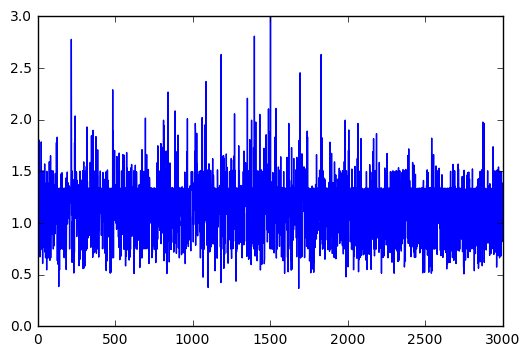

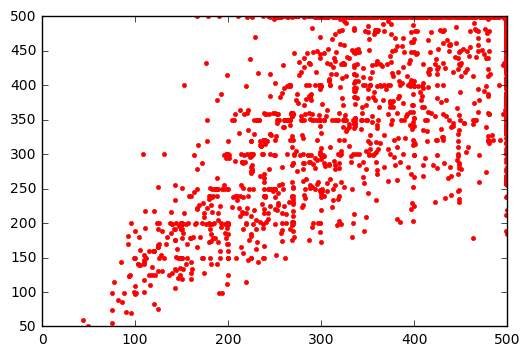

In [34]:
# Here, we want to get some basic statistics on the images.
# Specifically, we want to know the aspect ratio and mean 
# width/height.
allImages = trainImages + testImages
height = []
width = []
aspectRatio = []
for image in allImages:
    h,w,d = np.shape (image)
    height.append (h)
    width.append (w)
    aspectRatio.append (float (w) / float (h))
    
print ("Mean Aspect Ratio %0.2f" % np.mean (aspectRatio))
print ("Mean Height %0.2f" % np.mean (height))
print ("Mean Width %0.2f" % np.mean (width))
print ("Min/Max Height %d %d" % (np.min (height), np.max (height)))
print ("Min/Max Width %d %d" % (np.min (width), np.max (width)))

# Plots for convenience
plt.plot (aspectRatio)
plt.show ()

plt.plot (height, width, '.r')
plt.show ()

In [ ]:
# Free up some memory, this dataset is big 
# for my computer :(
del trainImages
del testImages
del allImages

In [4]:
# We will resize each image to 256x256. We are going
# to lose a lot of information but this will make it manageable
# for my computer to process.
HEIGHT=256
WIDTH=256

# Python lambda function for convenience. It just 
# acts as a proxy for tensorflow's resize function.
resizeFunction = lambda image: tf.image.resize_image_with_crop_or_pad (image, HEIGHT, WIDTH)

# Re-read all the images but this time resize them to be 256x256
processedTrainImages = ReadImages (trainFilenames, resizeFunction)
processedTestImages = ReadImages (testFilenames, resizeFunction)

Images Processed 1000
Images Processed 2000
Images Processed 3000
Images Processed 4000
Images Processed 5000
Images Processed 6000
Images Processed 7000
Images Processed 8000
Images Processed 9000
Images Processed 10000
Images Processed 11000
Images Processed 12000
Images Processed 13000
Images Processed 14000
Images Processed 15000
Images Processed 16000
Images Processed 17000
Images Processed 18000
Images Processed 19000
Images Processed 20000
Images Processed 21000
Images Processed 22000
Images Processed 23000
Images Processed 24000
Images Processed 25000
Images Processed 1000
Images Processed 2000
Images Processed 3000
Images Processed 4000
Images Processed 5000
Images Processed 6000
Images Processed 7000
Images Processed 8000
Images Processed 9000
Images Processed 10000
Images Processed 11000
Images Processed 12000


In [3]:
def CreateBatch (data, prefix, batchSize):
    """This function pickleizes batches that can be used for
       training and testing later on.
       
    Keyword Arguments:
    data - what to create a batch from
    prefix - this prefix to give each filename
    batchSize - size of each batch
    """
    currentBatch = 0
    while (currentBatch * batchSize) < len (data):
        with open (str (prefix) + '_' + str(currentBatch+1) + '-' + str (batchSize) + '.pkl', 'wb') as fileHandle:
            content = data[(currentBatch * batchSize):((currentBatch+1) * batchSize)]
            pickle.dump (content, fileHandle)
            print 'Current Batch %d - Length %d' % (currentBatch+1, batchSize)
            
        currentBatch += 1

In [6]:
# Create labels for our data. This is 'one_hot' 
# data as tensorflow likes to call it.
labels = [[0.,1.] if 'dog' in name else [1.,0.] for name in trainFilenames]

# Create our batches.
CreateBatch (labels, PROCESSED_LABEL_DIR + 'labels', 5000)
CreateBatch (processedTrainImages, PROCESSED_TRAIN_DIR + 'train', 5000)
CreateBatch (processedTestImages, PROCESSED_TEST_DIR + 'test', 5000)

Current Batch 1 - Length 5000
Current Batch 2 - Length 5000
Current Batch 3 - Length 5000
Current Batch 4 - Length 5000
Current Batch 5 - Length 5000
Current Batch 1 - Length 5000
Current Batch 2 - Length 5000
Current Batch 3 - Length 5000
Current Batch 4 - Length 5000
Current Batch 5 - Length 5000
Current Batch 1 - Length 5000
Current Batch 2 - Length 5000
Current Batch 3 - Length 5000
